In [1]:
import pathlib 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold
from tensorflow.keras.utils import plot_model
import eli5
from eli5.sklearn import PermutationImportance

C:\Users\janpo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\janpo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
train_log =pd.read_csv('best.csv',skipinitialspace=True)
train_log

# get dataset from csv file 
path='Plot\\'
if os.path.exists(path)==False:
    os.mkdir(path)

In [3]:
def grad(x2,x1,y2,y1):
    g=(y2-y1)/(x2-x1)
    return g

def norm(x):     
    return (x-min)/(max-min)

def r2(inp,pred):
    Minp= np.mean(inp)
    Mpred=np.mean(pred)
    
    temp1=inp-Minp
    temp2=pred-Mpred

    temp3= temp1**2
    temp4= temp2**2

    temp5=np.sqrt(np.sum(temp3))
    temp6=np.sqrt(np.sum(temp4))

    temp7= np.sum(temp1*temp2)
    temp8=temp5*temp6
    cor=temp7/temp8
    return cor**2 

def mae(inp,pred):
    temp1= np.abs(inp-pred)
    temp1=np.mean(temp1)

    return temp1

def rmse(inp,pred):
    temp1= (inp-pred)**2
    temp1=np.mean(temp1)
    temp1=np.sqrt(temp1)
    return temp1


In [100]:
train_log

,Network,Train_R2,Train_R2 std,Train_RSME,Train_RSME std,Train_MAE,Train_MAE std,Test_R2,Test_R2 std,Test_RSME,Test_RSME std,Test_MAE,Test_MAE std,Epoch,LR,qweqweqwe
0,Trial-45(7 x 10 x 10 x 1),0.983216,0.004735,0.022948,0.002218,0.011043,0.002263,0.963393,0.023211,0.033441,0.015067,0.017575,0.008258,655,0.00300,1
1,Trial-57(7 x 12 x 12 x 1),0.975927,0.008455,0.027099,0.004871,0.014110,0.003976,0.959278,0.025164,0.037495,0.015245,0.020153,0.005843,772,0.00125,2
2,Trial-60(7 x 18 x 18 x 1),0.989455,0.005896,0.018004,0.007493,0.009245,0.003846,0.963933,0.022417,0.034827,0.013143,0.015892,0.004260,723,0.00125,3
3,Trial-61(7 x 20 x 20 x 1),0.986282,0.006291,0.020138,0.005225,0.009497,0.002695,0.967797,0.029078,0.033042,0.018797,0.014983,0.006504,743,0.00125,4
4,Trial-7(7 x 22 x 22 x 1),0.985281,0.012545,0.019145,0.009999,0.008594,0.003423,0.975512,0.026318,0.026653,0.020066,0.012389,0.007436,708,0.00175,5
5,Trial-62(7 x 22 x 22 x 1),0.988227,0.001370,0.019013,0.001936,0.008890,0.000933,0.959744,0.030428,0.031974,0.018200,0.014878,0.007164,1081,0.00125,6
6,Trial-63(7 x 24 x 24 x 1),0.981640,0.008630,0.022901,0.003695,0.011625,0.003455,0.962200,0.029982,0.032872,0.017885,0.016837,0.007846,515,0.00125,7
7,Trial-21(7 x 28 x 28 x 1),0.985779,0.007236,0.021237,0.006788,0.010616,0.002858,0.968601,0.018540,0.030228,0.011815,0.015349,0.004071,790,0.00100,8
8,Trial-32(7 x 28 x 28 x 1),0.987307,0.011877,0.019763,0.008764,0.010222,0.005479,0.965212,0.020306,0.031886,0.015327,0.015280,0.006079,689,0.00200,9
9,Trial-22(7 x 30 x 30 x 1),0.993083,0.002462,0.015095,0.002639,0.007677,0.000256,0.968944,0.028062,0.027019,0.016754,0.013208,0.006485,712,0.00100,10


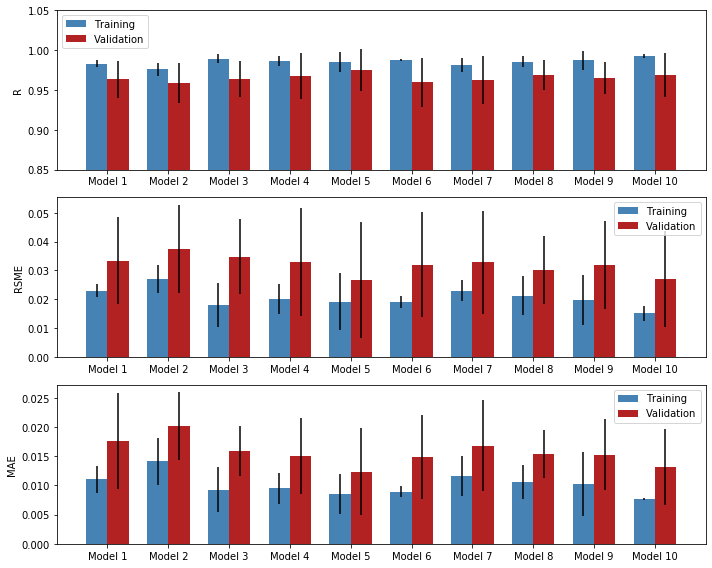

In [101]:
Labels=['Model 1','Model 2','Model 3','Model 4','Model 5','Model 6','Model 7','Model 8','Model 9','Model 10']
x=np.arange(len(Labels))

fig, ax= plt.subplots(3,figsize=(10,8))
width=0.35
train=ax[0].bar(x-width/2,train_log['Train_R2'],width, yerr=train_log['Train_R2 std'],label='Training',color='steelblue')
val=ax[0].bar(x+width/2,train_log['Test_R2'],width, yerr=train_log['Test_R2 std'],label="Validation",color='firebrick')
ax[0].set_xticks(x)
ax[0].set_xticklabels(Labels)
ax[0].set_ylabel('R')
ax[0].legend(loc='upper left')
ax[0].set_ylim([0.85,1.05])
train=ax[1].bar(x-width/2,train_log['Train_RSME'],width, yerr=train_log['Train_RSME std'],label='Training',color='steelblue')
val=ax[1].bar(x+width/2,train_log['Test_RSME'],width, yerr=train_log['Test_RSME std'],label="Validation",color='firebrick')
ax[1].set_xticks(x)
ax[1].set_xticklabels(Labels)
ax[1].set_ylabel('RSME')
ax[1].legend()

train=ax[2].bar(x-width/2,train_log['Train_MAE'],width, yerr=train_log['Train_MAE std'],label='Training',color='steelblue')
val=ax[2].bar(x+width/2,train_log['Test_MAE'],width, yerr=train_log['Test_MAE std'],label="Validation",color='firebrick')
ax[2].set_xticks(x)
ax[2].set_xticklabels(Labels)
ax[2].set_ylabel('MAE')
ax[2].legend()

fig.tight_layout()
fig.savefig('Plot\\stat.png',dpi=250)
plt.show()

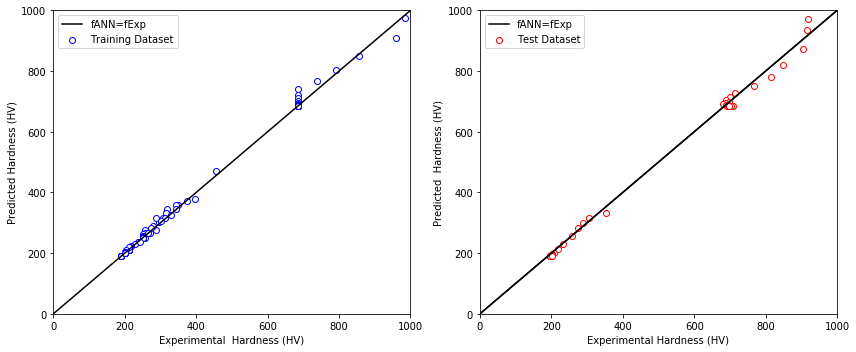

TRAINING :   R2 : 0.9978729790995702 RSME : 10.517065932322348  MAE : 4.877849913754209
TEST :   R2 : 0.9960043062121964 RSME : 17.02838995488868  MAE : 13.450086210416215


In [102]:
train = pd.read_csv('Final Model\\Trial-6\\train.csv',skipinitialspace=True)
test = pd.read_csv('Final Model\\Trial-6\\test.csv',skipinitialspace=True)

y_=(train['Hardness']+1)*train['Yield Strengh']
train_predictions=(train['Predict']+1)*train['Yield Strengh']

y_val_=(test['Hardness']+1)*test['Yield Strengh']
test_predictions= (test['Predict']+1)*test['Yield Strengh'] 

fig, (ax1,ax2)= plt.subplots(1,2,figsize=(12,5))
ax1.scatter(y_,train_predictions,color='w',edgecolors='b',marker='o',label='Training Dataset') # ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
ax1.set_ylabel('Predicted Hardness (HV)')
ax1.set_xlabel('Experimental  Hardness (HV)')
_ = ax1.plot([-2000, 2000], [-2000, 2000],color='k',label='fANN=fExp')
ax1.set_xlim([0,1000])
ax1.set_ylim([0,1000])
ax1.legend()

ax2.scatter(y_val_,test_predictions,color='w',edgecolors='r',marker='o',label='Test Dataset') # ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
ax2.set_ylabel('Predicted  Hardness (HV)')
ax2.set_xlabel('Experimental Hardness (HV)')
_ = ax2.plot([-2000, 2000], [-2000, 2000],color='k',label='fANN=fExp')
_ = ax2.plot([-2000, 2000], [-2000, 2000],color='k')
ax2.set_xlim([0,1000])
ax2.set_ylim([0,1000])
ax2.legend()

fig.tight_layout()
fig.savefig('Plot\\scat_val.png',dpi=250)
plt.show()


r2_train=r2(y_,train_predictions)
rmse_train=rmse(y_,train_predictions)
mae_train=mae(y_,train_predictions)

                                       
xr2_train=r2(y_val_,test_predictions)
xrmse_train=rmse(y_val_,test_predictions)
xmae_train=mae(y_val_,test_predictions)



# print('Epoch : ', str(hist['epoch'].tail(1).iloc[0])) 
print('TRAINING : ' ,' R2 :',str(r2_train),'RSME :',str(rmse_train),' MAE :',str(mae_train))
print('TEST : ' ,' R2 :',str(xr2_train),'RSME :',str(xrmse_train),' MAE :',str(xmae_train))

In [103]:
def norm(x):     
    return (x-min)/(max-min)

max=[1000,20,35,2000,40000,150,100]
max=np.array(max)
min=[0,0,0,0,0,0,0]
min=np.array(min)

column_names=['Hard-U','Fe %','Cr %','Depth','Strikes/mm2','Static Force','Amplitude','Hardness']
column_names_r=['Hard-U','Fe %','Cr %','Depth','Strikes/mm2','Static Force','Amplitude']

# #insert parameter 
# def set_mat(material):
    
#     if material =='718':
#         fe=17.62
#         hard=250
#         cr=18.84
#     elif material=='718Plus':
#         fe=9.66
#         hard=684
#         cr=17.42
#     elif material=='600':
#         fe=9.42
#         hard=185
#         cr=16.35
#     elif material=='600_1':
#         fe=9.42
#         hard=160
#         cr=16.35
#     elif material=='690':
#         fe=11.6
#         hard=200
#         cr=29.9
#     elif material=='690_1':
#         fe=11.6
#         hard=190
#         cr=29.9
#     return fe,hard,cr

def set_mat(material):
    
    if material =='718':
        fe=17.62
        hard=400
        cr=18.84
    elif material=='718Plus':
        fe=9.66
        hard=200
        cr=17.42
    elif material=='718Plus_2':
        fe=9.66
        hard=400
        cr=17.42
    elif material=='718Plus_3':
        fe=9.66
        hard=600
        cr=17.42
    elif material=='600':
        fe=9.42
        hard=200
        cr=16.35
    elif material=='690':
        fe=11.6
        hard=200
        cr=29.9
    
    return fe,hard,cr



# load_path='Final Model\\Trial-5\model.h5'
dir_path='Final Model\\Trial-6\\'
load_path=dir_path+'best_model.h5'
model = keras.models.load_model(load_path)

In [104]:

def plot_area(mat):
    fe,hard,cr=set_mat(mat)

    fig, ax=plt.subplots(2,2,figsize=(20,15))

    #for static load vs depth

    st_force=10
    amp=30
    num_strike=8571
    max_depth=1000



    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,6]=amp
    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)


    for z in range(10):
        z=z+1

        data[:,5]=st_force*z
        #normalization
        normed=norm(data)


        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions

        if z==1:
            res=temp.copy()
        else:
            res=res.append(temp,ignore_index=True, sort=False)


    X=res['Depth'].values
    Y=res['Static Force'].values
    Z=res['Prediction'].values
    X=X.reshape((10, 1001))
    Y=Y.reshape((10, 1001))
    Z=Z.reshape((10, 1001))


    ax[0,0].set_xlabel('Depth (mm)')
    ax[0,0].set_ylabel('Static Load (N)')
    im1=ax[0,0].contourf( X[0,:],Y[:,0],Z, cmap='RdBu')

    clb=fig.colorbar(im1, ax=ax[0,0])

    clb.ax.set_title('Hardness(HV)')


    #for ampitude vs depth


    st_force=30
    amp=10
    num_strike=8571
    max_depth=1000


    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,5]=st_force
    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)




    for z in range(10):
        z=z+1

        data[:,6]=amp*z
        #normalization
        normed=norm(data)


        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions

        if z==1:
            res=temp.copy()
        else:
            res=res.append(temp,ignore_index=True, sort=False)




    X=res['Depth'].values
    Y=res['Amplitude'].values
    Z=res['Prediction'].values
    X=X.reshape((10, 1001))
    Y=Y.reshape((10, 1001))
    Z=Z.reshape((10, 1001))


    ax[0,1].set_xlabel('Depth (mm)')
    ax[0,1].set_ylabel('Amplitude (mm)')
    im2=ax[0,1].contourf( X[0,:],Y[:,0],Z, cmap='RdBu')

    clb=fig.colorbar(im2, ax=ax[0,1])

    clb.ax.set_title('Hardness (HV)')



    #for number fo strikes vs depth
    
    st_force=30
    amp=30
    num_strike=1000
    max_depth=1000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,5]=st_force
    data[:,6]=amp
    data[:,3]=np.arange(max_depth+1)




    for z in range(10):
        z=z+1

        data[:,4]=num_strike*4*z
        #normalization
        normed=norm(data)


        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions

        if z==1:
            res=temp.copy()
        else:
            res=res.append(temp,ignore_index=True, sort=False)


    X=res['Depth'].values
    Y=res['Strikes/mm2'].values
    Z=res['Prediction'].values
    X=X.reshape((10, 1001))
    Y=Y.reshape((10, 1001))
    Z=Z.reshape((10, 1001))



    ax[1,0].set_xlabel('Depth (mm)')
    ax[1,0].set_ylabel('Number of Strikes/mm^2')
    im3=ax[1,0].contourf( X[0,:],Y[:,0],Z, cmap='RdBu')

    clb=fig.colorbar(im3, ax=ax[1,0])

    clb.ax.set_title('Hardness (HV)')


    #for static load vs ampltude

    st_force=100
    amp=10
    num_strike=8571
    max_depth=0

    data=np.zeros(((10),7))
    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,5]=np.arange(10,st_force+1,step=10)
    data[:,4]=num_strike
    data[:,3]=0


    for z in range(10):
        z=z+1

        data[:,6]=amp*z
        #normalization
        normed=norm(data)


        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions
        if z==1:
            res=temp.copy()
        else:
            res=res.append(temp,ignore_index=True, sort=False)


    X=res['Static Force'].values
    Y=res['Amplitude'].values
    Z=res['Prediction'].values
    X=X.reshape((10, 10))
    Y=Y.reshape((10, 10))
    Z=Z.reshape((10, 10))


    ax[1,1].set_xlabel('Static Load (N)')
    ax[1,1].set_ylabel('Amplitude (mm)')
    im4=ax[1,1].contourf( X[0,:],Y[:,0],Z, cmap='RdBu')

    clb=fig.colorbar(im4, ax=ax[1,1])

    clb.ax.set_title('Hardness (HV)')
    title='Alloy '+mat
    fig.suptitle(title,y=0.98,fontsize=20, fontweight='bold')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig('Plot\\area_'+mat+'.png',dpi=1000)
    plt.show()
    
    
    

# plot with effective depth

In [ ]:

def full_plot_area(mat):
    fe,hard,cr=set_mat(mat)

    fig, ax=plt.subplots(3,3,figsize=(20,15))

    #for static load vs depth

    st_force=10
    amp=30
    num_strike=8571
    max_depth=1000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,6]=amp
    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)


    for z in range(10):
        z=z+1

        data[:,5]=st_force*z
        #normalization
        normed=norm(data)


        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions

        if z==1:
            res=temp.copy()
        else:
            res=res.append(temp,ignore_index=True, sort=False)


    X=res['Depth'].values
    Y=res['Static Force'].values
    Z=res['Prediction'].values
    X=X.reshape((10, 1001))
    Y=Y.reshape((10, 1001))
    Z=Z.reshape((10, 1001))


    ax[0,0].set_xlabel('Depth (mm)')
    ax[0,0].set_ylabel('Static Load (N)')
    im1=ax[0,0].contourf( X[0,:],Y[:,0],Z, cmap='RdBu')

    clb=fig.colorbar(im1, ax=ax[0,0])

    clb.ax.set_title('Increase of Hardness (HV)')


    #for ampitude vs depth


    st_force=30
    amp=10
    num_strike=8571
    max_depth=1000


    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,5]=st_force
    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)




    for z in range(10):
        z=z+1

        data[:,6]=amp*z
        #normalization
        normed=norm(data)


        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions

        if z==1:
            res=temp.copy()
        else:
            res=res.append(temp,ignore_index=True, sort=False)




    X=res['Depth'].values
    Y=res['Amplitude'].values
    Z=res['Prediction'].values
    X=X.reshape((10, 1001))
    Y=Y.reshape((10, 1001))
    Z=Z.reshape((10, 1001))


    ax[0,1].set_xlabel('Depth (mm)')
    ax[0,1].set_ylabel('Amplitude (mm)')
    im2=ax[0,1].contourf( X[0,:],Y[:,0],Z, cmap='RdBu')

    clb=fig.colorbar(im2, ax=ax[0,1])

    clb.ax.set_title('Increase of Hardness (HV)')



    #for number fo strikes vs depth
    st_force=30
    amp=30
    num_strike=1000
    max_depth=1000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,5]=st_force
    data[:,6]=amp
    data[:,3]=np.arange(max_depth+1)




    for z in range(10):
        z=z+1

        data[:,4]=num_strike*z*4
        #normalization
        normed=norm(data)


        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions

        if z==1:
            res=temp.copy()
        else:
            res=res.append(temp,ignore_index=True, sort=False)


    X=res['Depth'].values
    Y=res['Strikes/mm2'].values
    Z=res['Prediction'].values
    X=X.reshape((10, 1001))
    Y=Y.reshape((10, 1001))
    Z=Z.reshape((10, 1001))



    ax[0,2].set_xlabel('Depth (mm)')
    ax[0,2].set_ylabel('Number of Strikes/mm^2')
    im3=ax[0,2].contourf( X[0,:],Y[:,0],Z, cmap='RdBu')

    clb=fig.colorbar(im3, ax=ax[0,2])

    clb.ax.set_title('Increase of Hardness (HV)')


    #for static load vs ampltude

    st_force=100
    amp=10
    num_strike=8571
    max_depth=0

    data=np.zeros(((10),7))
    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,5]=np.arange(10,st_force+1,step=10)
    data[:,4]=num_strike
    data[:,3]=0


    for z in range(10):
        z=z+1

        data[:,6]=amp*z
        #normalization
        normed=norm(data)


        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions
        if z==1:
            res=temp.copy()
        else:
            res=res.append(temp,ignore_index=True, sort=False)


    X=res['Static Force'].values
    Y=res['Amplitude'].values
    Z=res['Prediction'].values
    X=X.reshape((10, 10))
    Y=Y.reshape((10, 10))
    Z=Z.reshape((10, 10))


    ax[1,0].set_xlabel('Static Load (N)')
    ax[1,0].set_ylabel('Amplitude (mm)')
    im4=ax[1,0].contourf( X[0,:],Y[:,0],Z, cmap='RdBu')

    clb=fig.colorbar(im4, ax=ax[1,0])

    clb.ax.set_title('Increase of Hardness (HV)')
    
    
#for static load vs num of strikes 

    st_force=100
    amp=10
    num_strike=1000
    max_depth=0

    data=np.zeros(((10),7))
    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,5]=np.arange(10,st_force+1,step=10)
    data[:,4]=num_strike
    data[:,3]=0
    data[:,6]=amp

    for z in range(10):
        z=z+1

       
        #normalization
        normed=norm(data)
        data[:,4]=num_strike*z*4
        
        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions
        if z==1:
            res=temp.copy()
        else:
            res=res.append(temp,ignore_index=True, sort=False)


    X=res['Static Force'].values
    Y=res['Strikes/mm2'].values
    Z=res['Prediction'].values
    X=X.reshape((10, 10))
    Y=Y.reshape((10, 10))
    Z=Z.reshape((10, 10))


    ax[1,1].set_xlabel('Static Load (N)')
    ax[1,1].set_ylabel('Number of Strikes/mm^2')
    im5=ax[1,1].contourf( X[0,:],Y[:,0],Z, cmap='RdBu')

    clb=fig.colorbar(im5, ax=ax[1,1])

    clb.ax.set_title('Increase of Hardness (HV)')


    #for amplitude vs num of strikes 

    st_force=10
    amp=100
    num_strike=1000
    max_depth=0

    data=np.zeros(((10),7))
    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,6]=np.arange(10,amp+1,step=10)
    data[:,4]=num_strike
    data[:,3]=st_force

    for z in range(10):
        z=z+1

       
        #normalization
        normed=norm(data)
        data[:,4]=num_strike*z*4
        
        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions
        if z==1:
            res=temp.copy()
        else:
            res=res.append(temp,ignore_index=True, sort=False)


    X=res['Amplitude'].values
    Y=res['Strikes/mm2'].values
    Z=res['Prediction'].values
    X=X.reshape((10, 10))
    Y=Y.reshape((10, 10))
    Z=Z.reshape((10, 10))


    ax[1,2].set_xlabel('Amplitude')
    ax[1,2].set_ylabel('Number of Strikes/mm^2')
    im6=ax[1,2].contourf( X[0,:],Y[:,0],Z, cmap='RdBu')

    clb=fig.colorbar(im6, ax=ax[1,2])

    clb.ax.set_title('Increase of Hardness (HV)')
    
    #for static load vs amplitude (effective depth)

    st_force=10
    amp=10
    num_strike=8571
    max_depth=1000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr

    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)

    plot_x=[]
    plot_y=[]
    plot_z=[]

    for x in range(10):
        x=x+1
        data[:,5]=st_force*x
        for y in range(10):
            y=y+1
            data[:,6]=amp*y
            normed=norm(data)
            test_predictions= model.predict(normed).flatten()

            temp=pd.DataFrame(data,columns=column_names_r)
            test_predictions= model.predict(normed).flatten()
            temp['Prediction']=test_predictions
            
            temp['Gradient']=np.nan
            temp['Gradient'][0]=0
            for k in range(1,max_depth+1):
                k_prev=k-1
                temp['Gradient'][k]=grad(k_prev, k,temp['Prediction'][k_prev],temp['Prediction'][k])
                      
            
            for k in range(1,max_depth+1):
                if temp['Gradient'][k-1]<-0.02 and temp['Gradient'][k]>=-0.02:
                    eff_depth=k-1
              

            plot_x.append(st_force*x)
            plot_y.append(amp*y)
            plot_z.append(eff_depth)



    X=np.array(plot_x).reshape((10, 10))
    Y=np.array(plot_y).reshape((10, 10))
    Z=np.array(plot_z).reshape((10, 10))           

    
    ax[2,0].set_xlabel('Static Load (N)')
    ax[2,0].set_ylabel('Amplitude (um)')
    im7=ax[2,0].contourf(X[:,0],Y[0,:],Z, cmap='RdBu')

    clb=fig.colorbar(im7, ax=ax[2,0])

    clb.ax.set_title('Effective Depth (um)')
    
    #for static load vs Num of strikes (effective depth)

    st_force=10
    amp=30
    num_strike=1000
    max_depth=1000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr

    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)
    data[:,6]=amp
    plot_x=[]
    plot_y=[]
    plot_z=[]



    for x in range(10):
        x=x+1
        data[:,5]=st_force*x
        for y in range(10):
            y=y+1
            data[:,4]=num_strike*y*4
            normed=norm(data)
            test_predictions= model.predict(normed).flatten()

            temp=pd.DataFrame(data,columns=column_names_r)
            test_predictions= model.predict(normed).flatten()
            temp['Prediction']=test_predictions

            temp['Gradient']=np.nan
            temp['Gradient'][0]=0
            for k in range(1,max_depth+1):
                k_prev=k-1
                temp['Gradient'][k]=grad(k_prev, k,temp['Prediction'][k_prev],temp['Prediction'][k])
                      
            
            for k in range(1,max_depth+1):
                if temp['Gradient'][k-1]<-0.02 and temp['Gradient'][k]>=-0.02:
                    eff_depth=k-1

            plot_x.append(st_force*x)
            plot_y.append(num_strike*y*4)
            plot_z.append(eff_depth)



    X=np.array(plot_x).reshape((10, 10))
    Y=np.array(plot_y).reshape((10, 10))
    Z=np.array(plot_z).reshape((10, 10))           

   

    ax[2,1].set_xlabel('Static Load (N)')
    ax[2,1].set_ylabel('Number of Strikes/mm^2')
    im8=ax[2,1].contourf(X[:,0],Y[0,:],Z, cmap='RdBu')

    clb=fig.colorbar(im8, ax=ax[2,1])

    clb.ax.set_title('Effective Depth (um)')
  

 #for Amplitude vs Num of strikes (effective depth)

    st_force=50
    amp=10
    num_strike=1000
    max_depth=1000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,5]=st_force
    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)
    
    plot_x=[]
    plot_y=[]
    plot_z=[]



    for x in range(10):
        x=x+1
        data[:,6]=amp*x
        for y in range(10):
            y=y+1
            data[:,4]=num_strike*y*4
            normed=norm(data)
            test_predictions= model.predict(normed).flatten()

            temp=pd.DataFrame(data,columns=column_names_r)
            test_predictions= model.predict(normed).flatten()
            temp['Prediction']=test_predictions
            
            temp['Gradient']=np.nan
            temp['Gradient'][0]=0
            for k in range(1,max_depth+1):
                k_prev=k-1
                temp['Gradient'][k]=grad(k_prev, k,temp['Prediction'][k_prev],temp['Prediction'][k])
                      
            
            for k in range(1,max_depth+1):
                if temp['Gradient'][k-1]<-0.02and temp['Gradient'][k]>=-0.02:
                    eff_depth=k-1

            plot_x.append(st_force*x)
            plot_y.append(num_strike*y*4)
            plot_z.append(eff_depth)



    X=np.array(plot_x).reshape((10, 10))
    Y=np.array(plot_y).reshape((10, 10))
    Z=np.array(plot_z).reshape((10, 10))           

   

    ax[2,2].set_xlabel('Amplitude')
    ax[2,2].set_ylabel('Number of Strikes/mm^2')
    im9=ax[2,2].contourf(X[:,0],Y[0,:],Z, cmap='RdBu')

    clb=fig.colorbar(im9, ax=ax[2,2])

    clb.ax.set_title('Effective Depth (um)')


    title='Alloy '+mat
    fig.suptitle(title,y=0.98,fontsize=20, fontweight='bold')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig('Plot\\f_area_'+mat+'.png',dpi=1000)
    plt.show()


# plot with area under curve

In [5]:
def full_plot_area(mat):
    fe,hard,cr=set_mat(mat)

    fig, ax=plt.subplots(3,3,figsize=(20,15),constrained_layout=True)

    cpad=-0.01
    levels_RS=np.arange(0,280,40)
    cmap_RS='Blues'
    levels_d=np.arange(0,1001,200)
    cmap_d='Blues'
    levels_auc=np.arange(0,125001,25000)
    cmap_auc='Blues'
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
 
#----------------------------------------------------------------------------------------------------------------------------------------------------------------    
    #for static load vs amplitude (effective depth)

    st_force=10
    amp=10
    num_strike=10000
    max_depth=2000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr

    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)

    plot_x=[]
    plot_y=[]
    plot_z=[]
    plot_A=[]
    plot_C=[]
    
    for x in range(10):
        x=x+1
        data[:,5]=st_force*x
        for y in range(10):
            y=y+1
            data[:,6]=amp*y
            normed=norm(data)
            test_predictions= model.predict(normed).flatten()

            temp=pd.DataFrame(data,columns=column_names_r)
            test_predictions= model.predict(normed).flatten()
            temp['Prediction']=test_predictions*500
            
            crs=temp['Prediction'][0]
            
            temp['Gradient']=np.nan
            temp['Gradient'][0]=0
            for k in range(1,max_depth+1):
                k_prev=k-1
                temp['Gradient'][k]=grad(k_prev, k,temp['Prediction'][k_prev],temp['Prediction'][k])
                      
            
            for k in range(1,max_depth+1):
                if temp['Gradient'][k-1]<-0.01 and temp['Gradient'][k]>=-0.01:
                    eff_depth=k-1
            area=0
            
            for k in range(eff_depth):
                area=area+temp['Prediction'][k]

            plot_x.append(st_force*x)
            plot_y.append(amp*y)
            plot_z.append(eff_depth)
            plot_A.append(area)
            plot_C.append(crs)



    X=np.array(plot_x).reshape((10, 10))
    Y=np.array(plot_y).reshape((10, 10))
    Z=np.array(plot_z).reshape((10, 10)).transpose()           
    A=np.array(plot_A).reshape((10,10)).transpose() 
    C=np.array(plot_C).reshape((10,10)).transpose() 
    
    ax[0,0].set_title('a',loc='left', fontsize=18, fontweight='bold')
    ax[0,0].set_xlabel('Static Load (N)')
    ax[0,0].set_ylabel('Amplitude ($\mu$m)')
    im4=ax[0,0].contourf( X[:,0],Y[0,:],C,levels_RS, cmap=cmap_RS,extend='max')
    
    ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
    ax[1,0].set_xlabel('Static Load (N)')
    ax[1,0].set_ylabel('Amplitude ($\mu$m)')
    im7=ax[1,0].contourf(X[:,0],Y[0,:],Z, levels_d, cmap=cmap_d,extend='max')

    
    ax[2,0].set_title('g',loc='left', fontsize=18, fontweight='bold')
    ax[2,0].set_xlabel('Static Load (N)')
    ax[2,0].set_ylabel('Amplitude ($\mu$m)')
    im10=ax[2,0].contourf(X[:,0],Y[0,:],A, levels_auc, cmap=cmap_auc,extend='max')

  
    
 #----------------------------------------------------------------------------------------------------------------------------------------------------------------   
    #for static load vs Num of strikes (effective depth)

    st_force=10
    amp=30
    num_strike=1000
    max_depth=2000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr

    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)
    data[:,6]=amp
    plot_x=[]
    plot_y=[]
    plot_z=[]
    plot_A=[]
    plot_C=[]

    for x in range(10):
        x=x+1
        data[:,5]=st_force*x
        for y in range(10):
            y=y+1
            data[:,4]=num_strike*y*4
            normed=norm(data)
            test_predictions= model.predict(normed).flatten()

            temp=pd.DataFrame(data,columns=column_names_r)
            test_predictions= model.predict(normed).flatten()
            temp['Prediction']=test_predictions*500
            
            
            crs=temp['Prediction'][0]
            
            temp['Gradient']=np.nan
            temp['Gradient'][0]=0
            for k in range(1,max_depth+1):
                k_prev=k-1
                temp['Gradient'][k]=grad(k_prev, k,temp['Prediction'][k_prev],temp['Prediction'][k])
                      
            
            for k in range(1,max_depth+1):
                if temp['Gradient'][k-1]<-0.01 and temp['Gradient'][k]>=-0.01:
                    eff_depth=k-1

                    
            area=0
            
            for k in range(eff_depth):
                area=area+temp['Prediction'][k]
                
            plot_x.append(st_force*x)
            plot_y.append(num_strike*y*4)
            plot_z.append(eff_depth)
            plot_A.append(area)
            plot_C.append(crs)


    X=np.array(plot_x).reshape((10, 10))
    Y=np.array(plot_y).reshape((10, 10))
    Z=np.array(plot_z).reshape((10, 10)).transpose()           
    A=np.array(plot_A).reshape((10,10)).transpose() 
    C=np.array(plot_C).reshape((10,10)).transpose() 
   
    ax[0,1].set_title('b',loc='left', fontsize=18, fontweight='bold')
    ax[0,1].set_xlabel('Static Load (N)')
    ax[0,1].set_ylabel('Number of Strikes/mm$^2$')
    im5=ax[0,1].contourf( X[:,0],Y[0,:],C,levels_RS, cmap=cmap_RS,extend='max')

    ax[1,1].set_title('e',loc='left', fontsize=18, fontweight='bold')
    ax[1,1].set_xlabel('Static Load (N)')
    ax[1,1].set_ylabel('Number of Strikes/mm$^2$')
    im8=ax[1,1].contourf(X[:,0],Y[0,:],Z, levels_d, cmap=cmap_d,extend='max')

    ax[2,1].set_title('h',loc='left', fontsize=18, fontweight='bold')
    ax[2,1].set_xlabel('Static Load (N)')
    ax[2,1].set_ylabel('Number of Strikes/mm$^2$')
    im11=ax[2,1].contourf(X[:,0],Y[0,:],A, levels_auc, cmap=cmap_auc,extend='max')

    
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
 #for Amplitude vs Num of strikes (effective depth)

    st_force=50
    amp=10
    num_strike=1000
    max_depth=2000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,5]=st_force
    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)
    
    plot_x=[]
    plot_y=[]
    plot_z=[]
    plot_A=[]
    plot_C=[]

    for x in range(10):
        x=x+1
        data[:,6]=amp*x
        for y in range(10):
            y=y+1
            data[:,4]=num_strike*y*4
            normed=norm(data)
            test_predictions= model.predict(normed).flatten()

            temp=pd.DataFrame(data,columns=column_names_r)
            test_predictions= model.predict(normed).flatten()
            temp['Prediction']=test_predictions*500
            
            crs=temp['Prediction'][0]
            
            temp['Gradient']=np.nan
            temp['Gradient'][0]=0
            for k in range(1,max_depth+1):
                k_prev=k-1
                temp['Gradient'][k]=grad(k_prev, k,temp['Prediction'][k_prev],temp['Prediction'][k])
                      
           
            for k in range(1,max_depth+1):
                if temp['Gradient'][k-1]<-0.01 and temp['Gradient'][k]>=-0.01:
                    eff_depth=k-1
            
            area=0
            
            for k in range(eff_depth):
                area=area+temp['Prediction'][k]                    
                    
                    
            plot_x.append(amp*x)
            plot_y.append(num_strike*y*4)
            plot_z.append(eff_depth)
            plot_A.append(area)
            plot_C.append(crs)
          
    
    X=np.array(plot_x).reshape((10, 10))
    Y=np.array(plot_y).reshape((10, 10))
    Z=np.array(plot_z).reshape((10, 10)).transpose()           
    A=np.array(plot_A).reshape((10,10)).transpose() 
    C=np.array(plot_C).reshape((10,10)).transpose() 
   

    ax[0,2].set_title('c',loc='left', fontsize=18, fontweight='bold')
    ax[0,2].set_xlabel('Amplitude ($\mu$m)')
    ax[0,2].set_ylabel('Number of Strikes/mm$^2$')
    im6=ax[0,2].contourf( X[:,0],Y[0,:],C,levels_RS, cmap=cmap_RS,extend='max')

    axes=[ax[0,0],ax[0,1],ax[0,2]]
    clb=fig.colorbar(im6, ax=axes,pad=cpad)

    clb.ax.set_title('Increase of Hardness (HV)')
    
    ax[1,2].set_title('f',loc='left', fontsize=18, fontweight='bold')
    ax[1,2].set_xlabel('Amplitude ($\mu$m)')
    ax[1,2].set_ylabel('Number of Strikes/mm$^2$')
    im9=ax[1,2].contourf(X[:,0],Y[0,:],Z, levels_d, cmap=cmap_d,extend='max')

    axes=[ax[1,0],ax[1,1],ax[1,2]]
    clb=fig.colorbar(im9, ax=axes,pad=cpad)

    clb.ax.set_title('Effective Depth ($\mu$m)')

    ax[2,2].set_title('i',loc='left', fontsize=18, fontweight='bold')    
    ax[2,2].set_xlabel('Amplitude ($\mu$m)')
    ax[2,2].set_ylabel('Number of Strikes/mm$^2$')
    im12=ax[2,2].contourf(X[:,0],Y[0,:],A, levels_auc, cmap=cmap_auc,extend='max')
    #ax[2,2].text(10,-50,'(*Hardness: ,Fe: ,Cr: \nStatic load: )',style='italic')
    axes=[ax[2,0],ax[2,1],ax[2,2]]
    clb=fig.colorbar(im12, ax=axes,pad=cpad)
 
    clb.ax.set_title('Area under Curve')
    
    
 #----------------------------------------------------------------------------------------------------------------------------------------------------------------   

    title='Alloy '+mat
    fig.suptitle(title,y=1.01,fontsize=20, fontweight='bold')
   
   # fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig('Plot\\f_area_'+mat+'.png',dpi=250,bbox_inches = "tight")
    plt.show()


In [113]:
fe,hard,cr=set_mat('718')

#----------------------------------------------------------------------------------------------------------------------------------------------------------------

#----------------------------------------------------------------------------------------------------------------------------------------------------------------    
#for static load vs amplitude (effective depth)

st_force=10
amp=5
num_strike=5000
max_depth=2000

data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z1=[]
plot_A1=[]
plot_C1=[]

for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=(test_predictions)*hard

        crs=temp['Prediction'][0]
        eff_depth=0
        temp['Gradient']=test_predictions*100
        for k in range(1,max_depth+1):
            if temp['Gradient'][k-1]>1 and temp['Gradient'][k]<=1:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        plot_z1.append(eff_depth)
        plot_A1.append(area)
        plot_C1.append(crs)


#----------------------------------------------------------------------------------------------------------------------------------------------------------------    
#for static load vs amplitude (effective depth)


num_strike=10000

data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)


plot_z2=[]
plot_A2=[]
plot_C2=[]

for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=(test_predictions)*hard

        crs=temp['Prediction'][0]
        eff_depth=0
        temp['Gradient']=test_predictions*100
        for k in range(1,max_depth+1):
            if temp['Gradient'][k-1]>1 and temp['Gradient'][k]<=1:
                eff_depth=k-1
        area=0
        
        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        plot_z2.append(eff_depth)
        plot_A2.append(area)
        plot_C2.append(crs)
        #----------------------------------------------------------------------------------------------------------------------------------------------------------------    
#for static load vs amplitude (effective depth)


num_strike=20000


data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_z3=[]
plot_A3=[]
plot_C3=[]

for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=(test_predictions)*hard

        crs=temp['Prediction'][0]
        eff_depth=0
        temp['Gradient']=test_predictions*100
        for k in range(1,max_depth+1):
            if temp['Gradient'][k-1]>1 and temp['Gradient'][k]<=1:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]


        plot_z3.append(eff_depth)
        plot_A3.append(area)
        plot_C3.append(crs)
        #----------------------------------------------------------------------------------------------------------------------------------------------------------------    
#for static load vs amplitude (effective depth)


num_strike=30000


data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)


plot_z4=[]
plot_A4=[]
plot_C4=[]

for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=(test_predictions)*hard
        crs=temp['Prediction'][0]

#         temp['Gradient']=np.nan
#         temp['Gradient'][0]=0
#         for k in range(1,max_depth+1):
#             k_prev=k-1
#             temp['Gradient'][k]=grad(k_prev, k,temp['Prediction'][k_prev],temp['Prediction'][k])


#         for k in range(1,max_depth+1):
#             if temp['Gradient'][k-1]<-0.02 and temp['Gradient'][k]>=-0.02:
#                 eff_depth=k-1
                
                
        eff_depth=0       
        temp['Gradient']=test_predictions*100
        for k in range(1,max_depth+1):
            if temp['Gradient'][k-1]>1 and temp['Gradient'][k]<=1:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]


        plot_z4.append(eff_depth)
        plot_A4.append(area)
        plot_C4.append(crs)

 




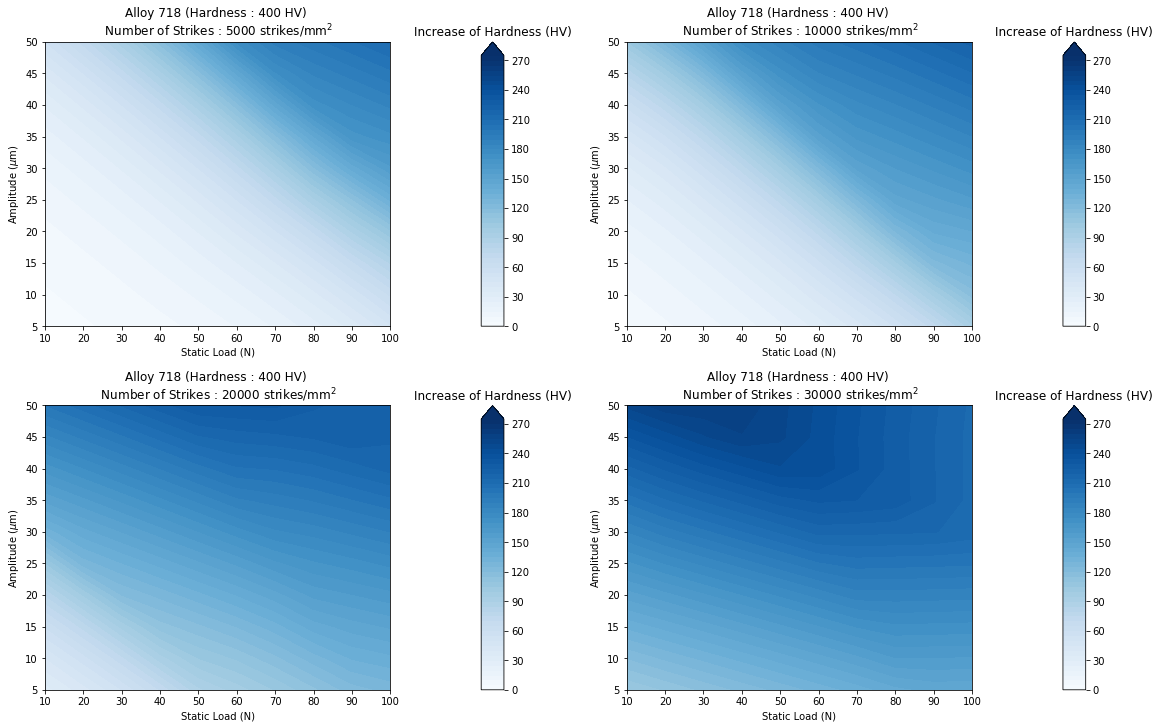

In [119]:
fig, ax=plt.subplots(2,2,figsize=(16,10),constrained_layout=True)

cpad=-0.01
levels_RS=np.arange(0,280,5)
cmap_RS='Blues'

levels_auc=np.arange(0,45001,10000)
cmap_auc='Blues'

X=[10,20,30,40,50,60,70,80,90,100]
Y=[5,10,15,20,25,30,35,40,45,50]
         
A=np.array(plot_A1).reshape((10,10)).transpose() 
C=np.array(plot_C1).reshape((10,10)).transpose()

ax[0,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 5000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,0].set_xlabel('Static Load (N)')
ax[0,0].set_ylabel('Amplitude ($\mu$m)')
# ax[0,0].set_ylim((10,50))
im=ax[0,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[0,0])
clb.ax.set_title('Increase of Hardness (HV)')

          
A=np.array(plot_A2).reshape((10,10)).transpose() 
C=np.array(plot_C2).reshape((10,10)).transpose() 

ax[0,1].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,1].set_xlabel('Static Load (N)')
ax[0,1].set_ylabel('Amplitude ($\mu$m)')
# ax[0,1].set_ylim((10,50))
im=ax[0,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[0,1])
clb.ax.set_title('Increase of Hardness (HV)')

           
A=np.array(plot_A3).reshape((10,10)).transpose() 
C=np.array(plot_C3).reshape((10,10)).transpose() 

ax[1,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 20000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,0].set_xlabel('Static Load (N)')
ax[1,0].set_ylabel('Amplitude ($\mu$m)')
# ax[1,0].set_ylim((10,50))
im=ax[1,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[1,0])
clb.ax.set_title('Increase of Hardness (HV)')

        
A=np.array(plot_A4).reshape((10,10)).transpose() 
C=np.array(plot_C4).reshape((10,10)).transpose() 

ax[1,1].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 30000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,1].set_xlabel('Static Load (N)')
ax[1,1].set_ylabel('Amplitude ($\mu$m)')
# ax[1,1].set_ylim((10,50))
im=ax[1,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[1,1])
clb.ax.set_title('Increase of Hardness (HV)')


#fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('Plot\\H.png',dpi=250,bbox_inches = "tight")
# plt.show()

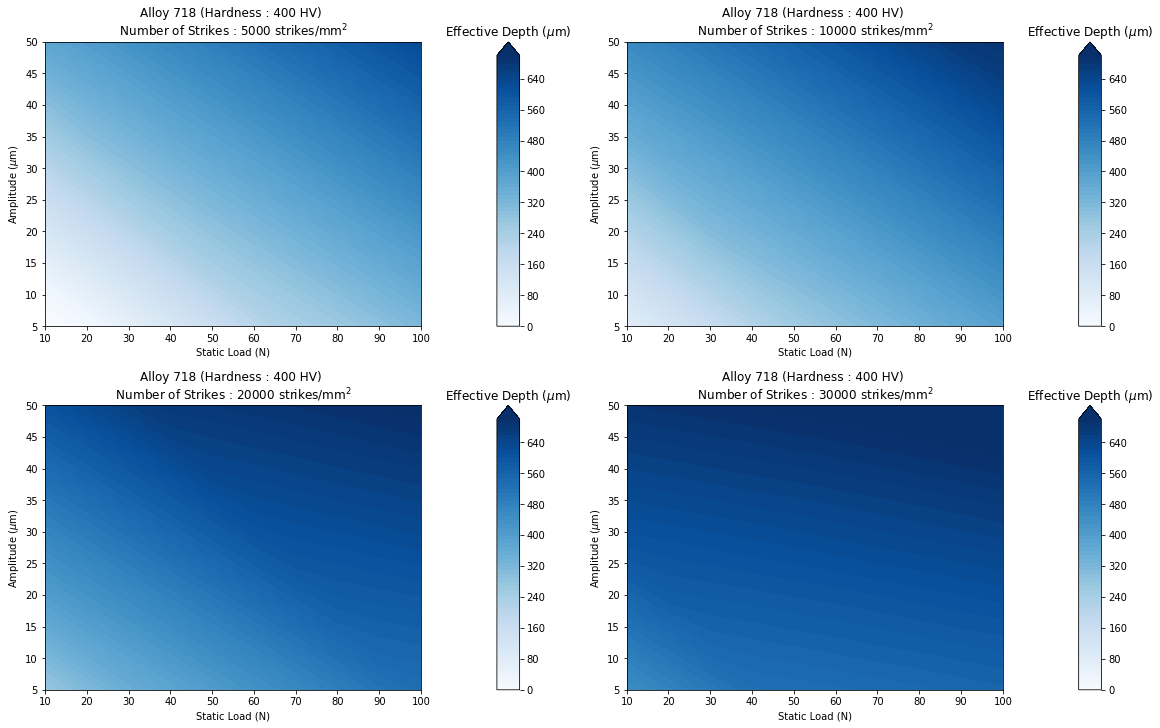

In [117]:
fig, ax=plt.subplots(2,2,figsize=(16,10),constrained_layout=True)

levels_d=np.arange(0,701,10)
cmap_d='Blues'

X=[10,20,30,40,50,60,70,80,90,100]
Y=[5,10,15,20,25,30,35,40,45,50]

Z=np.array(plot_z1).reshape((10, 10)).transpose() # ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
ax[0,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 5000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,0].set_xlabel('Static Load (N)')
ax[0,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,0].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[0,0])
clb.ax.set_title('Effective Depth ($\mu$m)')

Z=np.array(plot_z2).reshape((10, 10)).transpose() # ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
ax[0,1].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,1].set_xlabel('Static Load (N)')
ax[0,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,1].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[0,1])
clb.ax.set_title('Effective Depth ($\mu$m)')

Z=np.array(plot_z3).reshape((10, 10)).transpose() # ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
ax[1,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 20000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,0].set_xlabel('Static Load (N)')
ax[1,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,0].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[1,0])
clb.ax.set_title('Effective Depth ($\mu$m)')

Z=np.array(plot_z4).reshape((10, 10)).transpose() # ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
ax[1,1].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 30000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,1].set_xlabel('Static Load (N)')
ax[1,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,1].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[1,1])
clb.ax.set_title('Effective Depth ($\mu$m)')

fig.savefig('Plot\\eff.png',dpi=250,bbox_inches = "tight")

In [120]:

h1=400
h2=500
#----------------------------------------------------------------------------------------------------------------------------------------------------------------

#----------------------------------------------------------------------------------------------------------------------------------------------------------------    
#for static load vs amplitude (effective depth)

st_force=10
amp=5
num_strike=10000
max_depth=2000

fe,hard,cr=set_mat('600')
hard=h1

data=np.zeros(((max_depth+1),7))
data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z1=[]
plot_A1=[]
plot_C1=[]
plot_P1=[]

for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=(test_predictions)*hard

        crs=temp['Prediction'][0]

        eff_depth=0       
        temp['Gradient']=test_predictions*100
        for k in range(1,max_depth+1):
            if temp['Gradient'][k-1]>1 and temp['Gradient'][k]<=1:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]
        
        p=test_predictions[0]*100
        plot_P1.append(p)
        plot_z1.append(eff_depth)
        plot_A1.append(area)
        plot_C1.append(crs)
        
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
hard=h2


data=np.zeros(((max_depth+1),7))
data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z2=[]
plot_A2=[]
plot_C2=[]
plot_P2=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=(test_predictions)*hard

        crs=temp['Prediction'][0]

        eff_depth=0       
        temp['Gradient']=test_predictions*100
        for k in range(1,max_depth+1):
            if temp['Gradient'][k-1]>1 and temp['Gradient'][k]<=1:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        p=test_predictions[0]*100
        plot_P2.append(p)
        plot_z2.append(eff_depth)
        plot_A2.append(area)
        plot_C2.append(crs)


fe,hard,cr=set_mat('690')
hard=h1

data=np.zeros(((max_depth+1),7))
data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z3=[]
plot_A3=[]
plot_C3=[]
plot_P3=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=(test_predictions)*hard

        crs=temp['Prediction'][0]

        eff_depth=0       
        temp['Gradient']=test_predictions*100
        for k in range(1,max_depth+1):
            if temp['Gradient'][k-1]>1 and temp['Gradient'][k]<=1:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        p=test_predictions[0]*100
        plot_P3.append(p)
        plot_z3.append(eff_depth)
        plot_A3.append(area)
        plot_C3.append(crs)
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
hard=h2


data=np.zeros(((max_depth+1),7))
data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z4=[]
plot_A4=[]
plot_C4=[]
plot_P4=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=(test_predictions)*hard
        crs=temp['Prediction'][0]

        eff_depth=0       
        temp['Gradient']=test_predictions*100
        for k in range(1,max_depth+1):
            if temp['Gradient'][k-1]>1 and temp['Gradient'][k]<=1:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]
            
        p=test_predictions[0]*100
        plot_P4.append(p)
        plot_z4.append(eff_depth)
        plot_A4.append(area)
        plot_C4.append(crs)
#----------------------------------------------------------------------------------------------------------------------------------------------------------------

fe,hard,cr=set_mat('718')
hard=h1

data=np.zeros(((max_depth+1),7))
data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z5=[]
plot_A5=[]
plot_C5=[]
plot_P5=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=(test_predictions)*hard

        crs=temp['Prediction'][0]

        eff_depth=0       
        temp['Gradient']=test_predictions*100
        for k in range(1,max_depth+1):
            if temp['Gradient'][k-1]>1 and temp['Gradient'][k]<=1:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]
            
        p=test_predictions[0]*100
        plot_P5.append(p)
        plot_z5.append(eff_depth)
        plot_A5.append(area)
        plot_C5.append(crs)
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
hard=h2

data=np.zeros(((max_depth+1),7))
data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z6=[]
plot_A6=[]
plot_C6=[]
plot_P6=[]

for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=(test_predictions)*hard

        crs=temp['Prediction'][0]

        eff_depth=0       
        temp['Gradient']=test_predictions*100
        for k in range(1,max_depth+1):
            if temp['Gradient'][k-1]>1 and temp['Gradient'][k]<=1:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]
            
            
        p=test_predictions[0]*100
        plot_P6.append(p)
        plot_z6.append(eff_depth)
        plot_A6.append(area)
        plot_C6.append(crs)
 #----------------------------------------------------------------------------------------------------------------------------------------------------------------

fe,hard,cr=set_mat('718Plus')
hard=h1

data=np.zeros(((max_depth+1),7))
data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z7=[]
plot_A7=[]
plot_C7=[]
plot_P7=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=(test_predictions)*hard

        crs=temp['Prediction'][0]

        eff_depth=0       
        temp['Gradient']=test_predictions*100
        for k in range(1,max_depth+1):
            if temp['Gradient'][k-1]>1 and temp['Gradient'][k]<=1:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]
            
        p=test_predictions[0]*100
        plot_P7.append(p)
        plot_z7.append(eff_depth)
        plot_A7.append(area)
        plot_C7.append(crs)
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
hard=h2

data=np.zeros(((max_depth+1),7))
data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z8=[]
plot_A8=[]
plot_C8=[]
plot_P8=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=(test_predictions)*hard

        crs=temp['Prediction'][0]

        eff_depth=0       
        temp['Gradient']=test_predictions*100
        for k in range(1,max_depth+1):
            if temp['Gradient'][k-1]>1 and temp['Gradient'][k]<=1:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]
    
        p=test_predictions[0]*100
        plot_P8.append(p)
        plot_z8.append(eff_depth)
        plot_A8.append(area)
        plot_C8.append(crs)




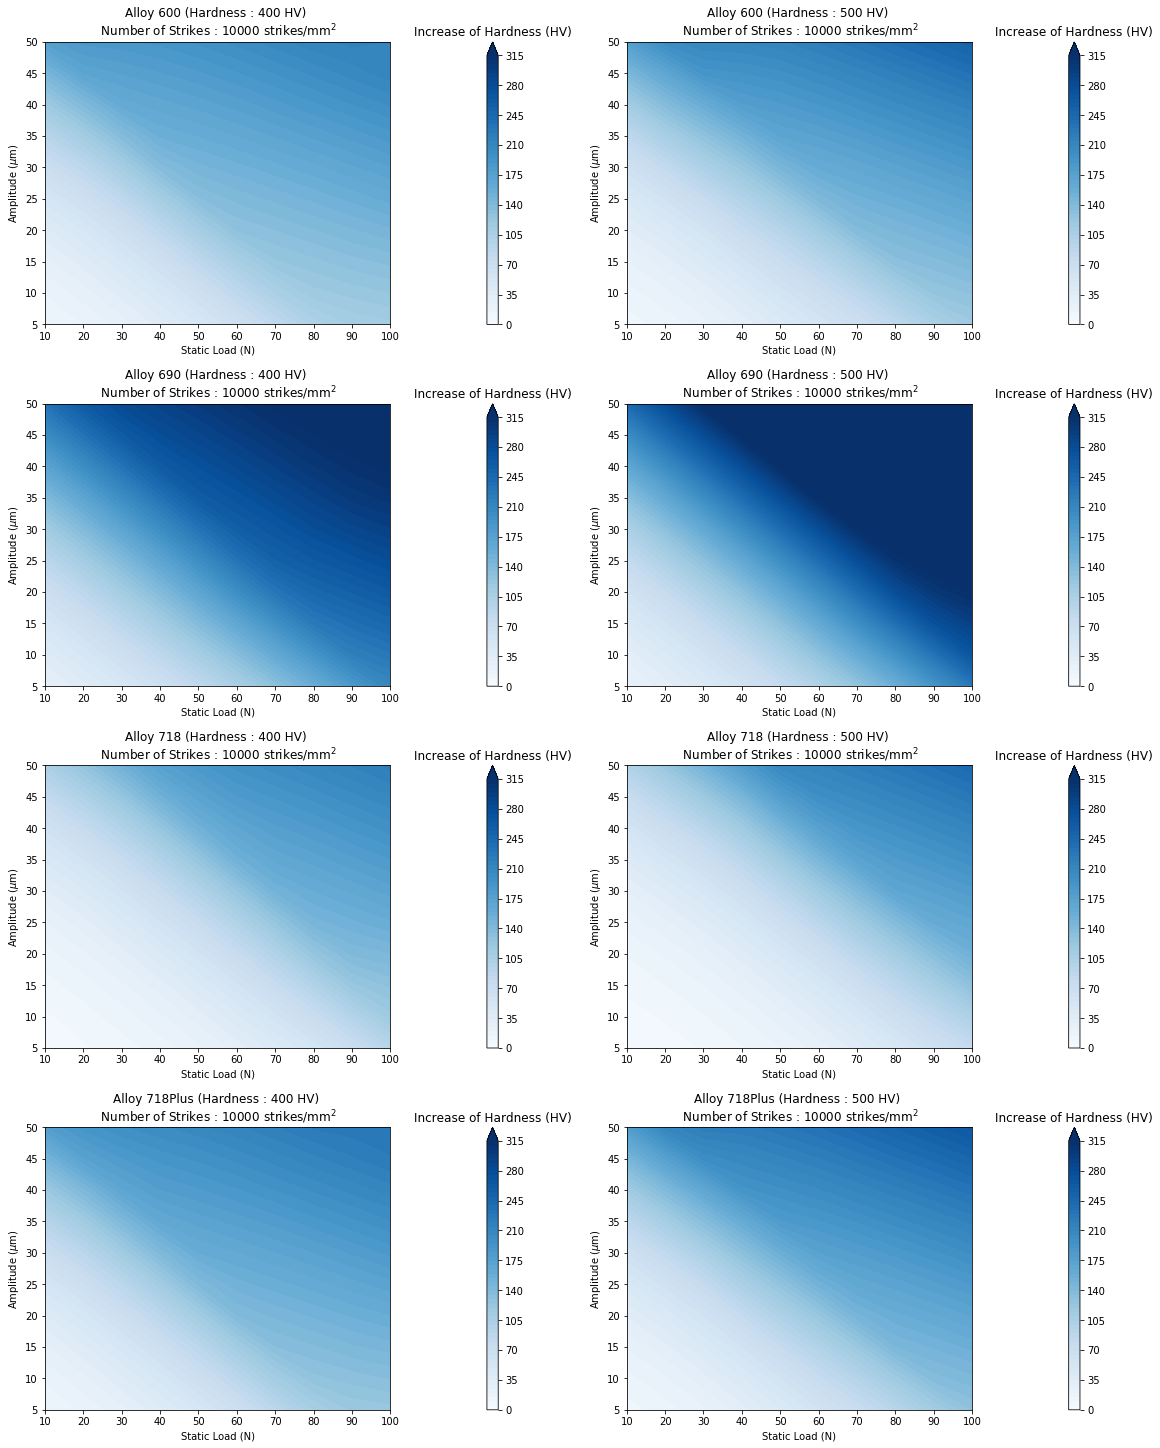

In [111]:
fig, ax=plt.subplots(4,2,figsize=(16,20),constrained_layout=True)

levels_RS=np.arange(0,320,5)
cmap_RS='Blues'

X=[10,20,30,40,50,60,70,80,90,100]
Y=[5,10,15,20,25,30,35,40,45,50]

         
A=np.array(plot_A1).reshape((10,10)).transpose() 
C=np.array(plot_C1).reshape((10,10)).transpose() 

ax[0,0].set_title('Alloy 600 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,0].set_xlabel('Static Load (N)')
ax[0,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[0,0])
clb.ax.set_title('Increase of Hardness (HV)')

          
A=np.array(plot_A2).reshape((10,10)).transpose() 
C=np.array(plot_C2).reshape((10,10)).transpose() 

ax[0,1].set_title('Alloy 600 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,1].set_xlabel('Static Load (N)')
ax[0,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[0,1])
clb.ax.set_title('Increase of Hardness (HV)')

           
A=np.array(plot_A3).reshape((10,10)).transpose() 
C=np.array(plot_C3).reshape((10,10)).transpose() 

ax[1,0].set_title('Alloy 690 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,0].set_xlabel('Static Load (N)')
ax[1,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[1,0])
clb.ax.set_title('Increase of Hardness (HV)')
        
A=np.array(plot_A4).reshape((10,10)).transpose() 
C=np.array(plot_C4).reshape((10,10)).transpose() 

ax[1,1].set_title('Alloy 690 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,1].set_xlabel('Static Load (N)')
ax[1,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[1,1])
clb.ax.set_title('Increase of Hardness (HV)')

A=np.array(plot_A5).reshape((10,10)).transpose() 
C=np.array(plot_C5).reshape((10,10)).transpose() 

ax[2,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[2,0].set_xlabel('Static Load (N)')
ax[2,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[2,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[2,0])
clb.ax.set_title('Increase of Hardness (HV)')

          
A=np.array(plot_A6).reshape((10,10)).transpose() 
C=np.array(plot_C6).reshape((10,10)).transpose() 

ax[2,1].set_title('Alloy 718 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[2,1].set_xlabel('Static Load (N)')
ax[2,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[2,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[2,1])
clb.ax.set_title('Increase of Hardness (HV)')

           
A=np.array(plot_A7).reshape((10,10)).transpose() 
C=np.array(plot_C7).reshape((10,10)).transpose() 

ax[3,0].set_title('Alloy 718Plus (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[3,0].set_xlabel('Static Load (N)')
ax[3,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[3,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[3,0])
clb.ax.set_title('Increase of Hardness (HV)')

        
A=np.array(plot_A8).reshape((10,10)).transpose() 
C=np.array(plot_C8).reshape((10,10)).transpose() 

ax[3,1].set_title('Alloy 718Plus (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[3,1].set_xlabel('Static Load (N)')
ax[3,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[3,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[3,1])
clb.ax.set_title('Increase of Hardness (HV)')

# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('Plot\\CRS.png',dpi=250,bbox_inches = "tight")


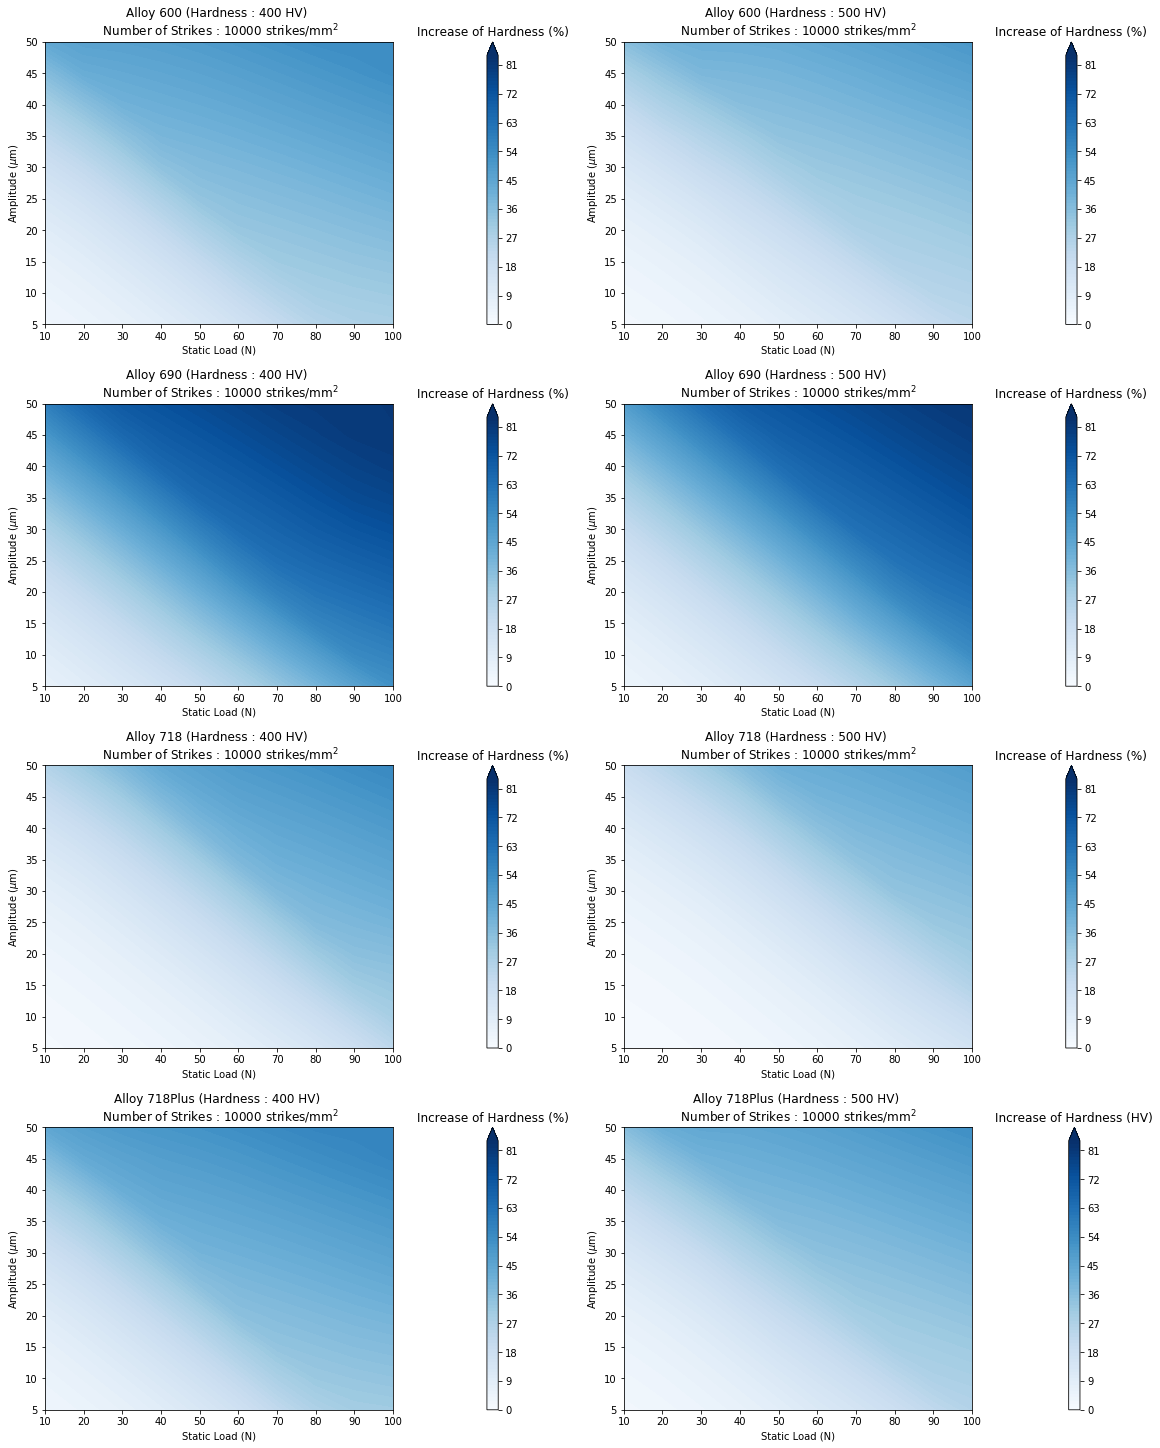

In [122]:
fig, ax=plt.subplots(4,2,figsize=(16,20),constrained_layout=True)

levels_RS=np.arange(0,85,1)
cmap_RS='Blues'

X=[10,20,30,40,50,60,70,80,90,100]
Y=[5,10,15,20,25,30,35,40,45,50]

         
C=np.array(plot_P1).reshape((10,10)).transpose() 

ax[0,0].set_title('Alloy 600 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,0].set_xlabel('Static Load (N)')
ax[0,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[0,0])
clb.ax.set_title('Increase of Hardness (%)')

          
C=np.array(plot_P2).reshape((10,10)).transpose() 

ax[0,1].set_title('Alloy 600 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,1].set_xlabel('Static Load (N)')
ax[0,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[0,1])
clb.ax.set_title('Increase of Hardness (%)')

           

C=np.array(plot_P3).reshape((10,10)).transpose() 

ax[1,0].set_title('Alloy 690 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,0].set_xlabel('Static Load (N)')
ax[1,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[1,0])
clb.ax.set_title('Increase of Hardness (%)')
        

C=np.array(plot_P4).reshape((10,10)).transpose() 

ax[1,1].set_title('Alloy 690 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,1].set_xlabel('Static Load (N)')
ax[1,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[1,1])
clb.ax.set_title('Increase of Hardness (%)')


C=np.array(plot_P5).reshape((10,10)).transpose() 

ax[2,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[2,0].set_xlabel('Static Load (N)')
ax[2,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[2,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[2,0])
clb.ax.set_title('Increase of Hardness (%)')

 
C=np.array(plot_P6).reshape((10,10)).transpose() 

ax[2,1].set_title('Alloy 718 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[2,1].set_xlabel('Static Load (N)')
ax[2,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[2,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[2,1])
clb.ax.set_title('Increase of Hardness (%)')


C=np.array(plot_P7).reshape((10,10)).transpose() 

ax[3,0].set_title('Alloy 718Plus (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[3,0].set_xlabel('Static Load (N)')
ax[3,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[3,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[3,0])
clb.ax.set_title('Increase of Hardness (%)')

        

C=np.array(plot_P8).reshape((10,10)).transpose() 

ax[3,1].set_title('Alloy 718Plus (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[3,1].set_xlabel('Static Load (N)')
ax[3,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[3,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='max')
clb=fig.colorbar(im, ax=ax[3,1])
clb.ax.set_title('Increase of Hardness (HV)')

# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('Plot\\CRS_2.png',dpi=250,bbox_inches = "tight")


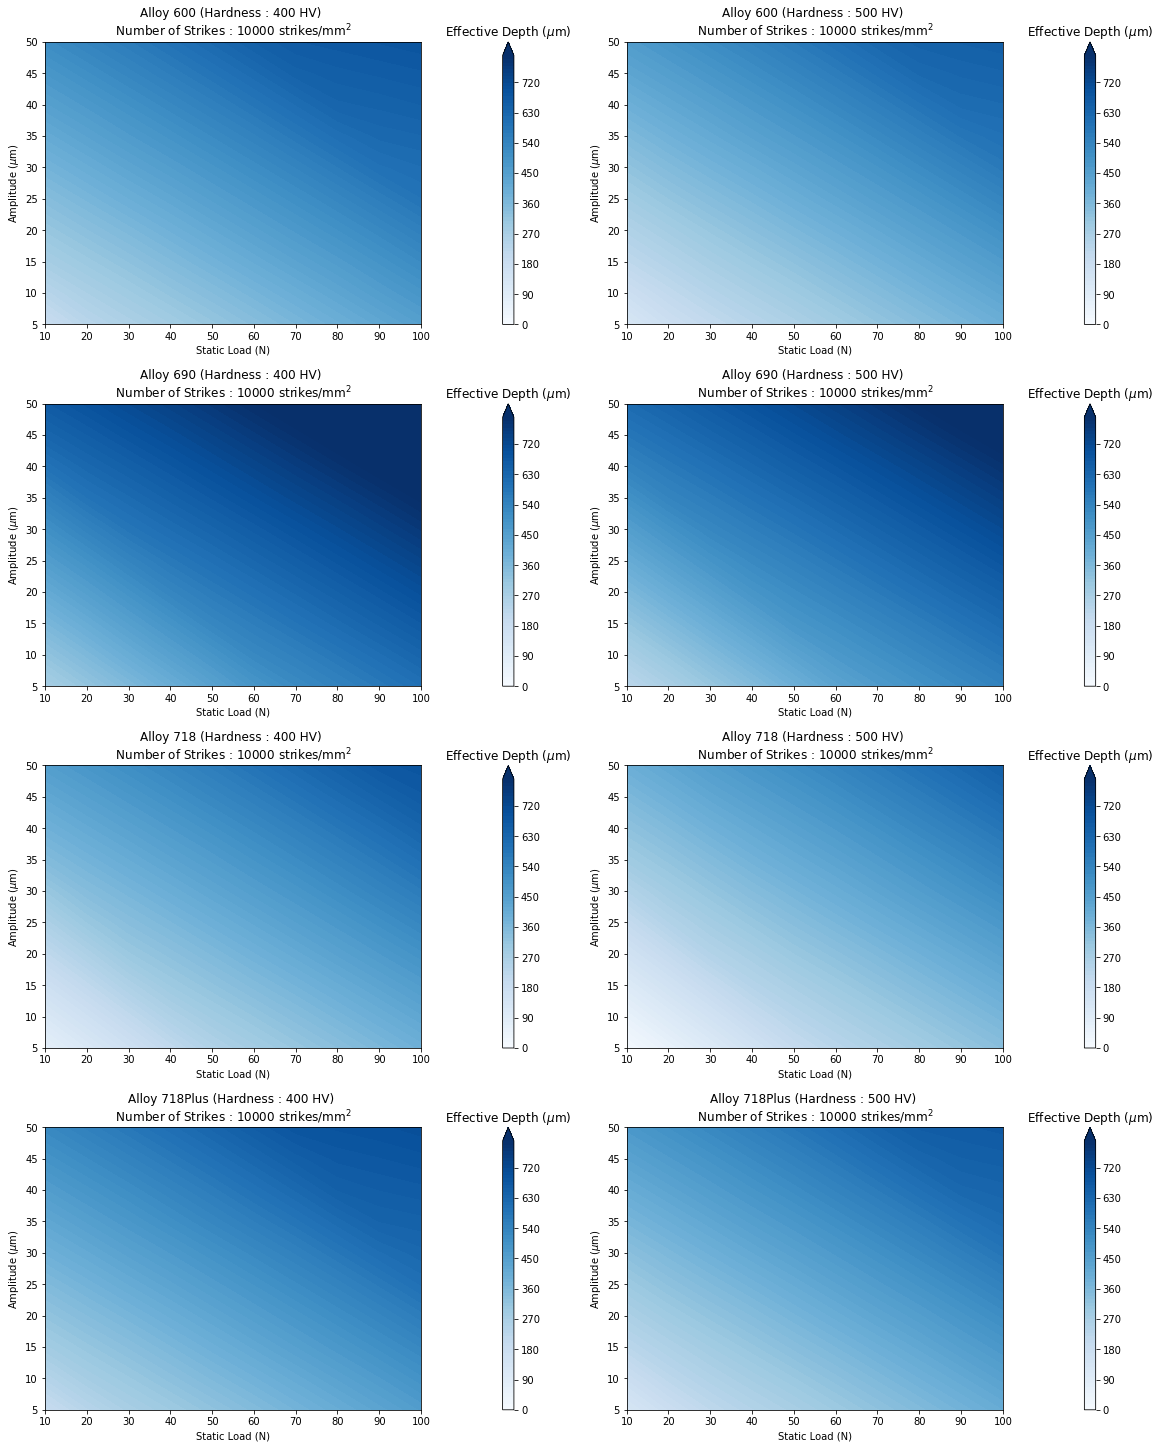

In [112]:
fig, ax=plt.subplots(4,2,figsize=(16,20),constrained_layout=True)

levels_d=np.arange(0,801,10)
cmap_d='Blues'

X=[10,20,30,40,50,60,70,80,90,100]
Y=[5,10,15,20,25,30,35,40,45,50]

         
Z=np.array(plot_z1).reshape((10, 10)).transpose()

ax[0,0].set_title('Alloy 600 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,0].set_xlabel('Static Load (N)')
ax[0,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,0].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[0,0])
clb.ax.set_title('Effective Depth ($\mu$m)')

          
Z=np.array(plot_z2).reshape((10, 10)).transpose()

ax[0,1].set_title('Alloy 600 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,1].set_xlabel('Static Load (N)')
ax[0,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,1].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[0,1])
clb.ax.set_title('Effective Depth ($\mu$m)')

           
Z=np.array(plot_z3).reshape((10, 10)).transpose()

ax[1,0].set_title('Alloy 690 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,0].set_xlabel('Static Load (N)')
ax[1,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,0].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[1,0])
clb.ax.set_title('Effective Depth ($\mu$m)')

        
Z=np.array(plot_z4).reshape((10, 10)).transpose()

ax[1,1].set_title('Alloy 690 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,1].set_xlabel('Static Load (N)')
ax[1,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,1].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[1,1])
clb.ax.set_title('Effective Depth ($\mu$m)')

Z=np.array(plot_z5).reshape((10, 10)).transpose()

ax[2,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[2,0].set_xlabel('Static Load (N)')
ax[2,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[2,0].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[2,0])
clb.ax.set_title('Effective Depth ($\mu$m)')
          
Z=np.array(plot_z6).reshape((10, 10)).transpose() 

ax[2,1].set_title('Alloy 718 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[2,1].set_xlabel('Static Load (N)')
ax[2,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[2,1].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[2,1])
clb.ax.set_title('Effective Depth ($\mu$m)')

           
Z=np.array(plot_z7).reshape((10, 10)).transpose()

ax[3,0].set_title('Alloy 718Plus (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[3,0].set_xlabel('Static Load (N)')
ax[3,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[3,0].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[3,0])
clb.ax.set_title('Effective Depth ($\mu$m)')

        
Z=np.array(plot_z8).reshape((10, 10)).transpose() 

ax[3,1].set_title('Alloy 718Plus (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[3,1].set_xlabel('Static Load (N)')
ax[3,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[3,1].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[3,1])
clb.ax.set_title('Effective Depth ($\mu$m)')

# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('Plot\\D_eff_2.png',dpi=250,bbox_inches = "tight")


In [ ]:
plt.subplot.clf()

In [ ]:
K.clear_session()

# Plot Hardness in respect to depth

In [4]:
def norm(x):     
    return (x-min)/(max-min)

max=[1000,20,35,2000,40000,150,100]
max=np.array(max)
min=[0,0,0,0,0,0,0]
min=np.array(min)

column_names=['Hard-U','Fe %','Cr %','Depth','Strikes/mm2','Static Force','Amplitude','Hardness']
column_names_r=['Hard-U','Fe %','Cr %','Depth','Strikes/mm2','Static Force','Amplitude']



#insert parameter 
def set_mat(material):
    
    if material =='718':
        fe=17.62
        hard=250
        cr=18.84
    if material =='7182':
        fe=17.62
        hard=200
        cr=18.84
    elif material=='718Plus':
        fe=9.66
        hard=684
        cr=17.42
    elif material=='600':
        fe=9.42
        hard=200
        cr=16.35
    elif material=='600_1':
        fe=9.42
        hard=160
        cr=16.35
    elif material=='690':
        fe=11.6
        hard=200
        cr=29.9
    elif material=='690_1':
        fe=11.6
        hard=190
        cr=29.9
    return fe,hard,cr

# load_path='Final Model\\Trial-5\model.h5'
dir_path='Final Model\\Trial-6\\'
load_path=dir_path+'best_model.h5'
model = keras.models.load_model(load_path)



def cal(mat,x,y,z):   
    
        #insert parameter 
       
    fe,hard,cr =set_mat(mat)

    st_force=x
    amp=y
    num_strike=z
    max_depth=2000


    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,6]=amp
    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)
    data[:,5]=st_force 
        
    normed=norm(data)

    test_predictions= model.predict(normed).flatten()

    res=pd.DataFrame(data,columns=column_names_r)
    res['Predict']=(test_predictions+1)*hard

    
          
    return res

In [5]:
data =pd.read_csv('plot_use_dataset.csv',skipinitialspace=True)
data

,D_600_1,H_600_1,D_600_2,H_600_2,D_690,H_690,D_718,H_718,D_718Plus,H_718Plus,D_600_3,H_600_3,VD_718Plus,VH_718Plus,VD_600,VH_600,VD_690,VH_690
0,0.0,377.21,0.0,316.07,0.0,395.94,0,344,0.0,984.06,50.0,274.17,0.0,919.27,0.0,327.16,50.0,343.74
1,50.0,266.34,50.0,234.42,50.0,375.42,50,343,25.0,984.74,150.0,264.64,25.0,917.28,50.0,265.33,150.0,295.69
2,175.0,245.15,175.0,221.30,100.0,348.03,100,330,75.0,958.37,250.0,250.30,75.0,905.28,175.0,234.40,250.0,279.54
3,300.0,216.24,300.0,198.27,150.0,317.41,150,302,125.0,856.54,350.0,241.84,125.0,848.52,300.0,218.59,350.0,265.47
4,400.0,204.80,400.0,190.86,200.0,315.84,200,280,175.0,791.77,450.0,211.45,175.0,815.15,400.0,208.16,450.0,247.76
5,500.0,201.42,500.0,187.14,250.0,305.80,250,256,225.0,739.70,550.0,203.00,225.0,767.75,500.0,195.54,550.0,221.50
6,750.0,186.60,750.0,183.91,300.0,295.76,300,258,275.0,682.94,650.0,201.50,275.0,713.67,750.0,181.39,650.0,210.02
7,1000.0,166.07,1000.0,168.42,250.0,287.74,350,249,325.0,680.29,750.0,198.39,325.0,700.33,1000.0,171.11,750.0,197.24
8,1250.0,163.34,1250.0,159.47,400.0,287.39,400,243,375.0,673.64,850.0,200.64,375.0,690.33,1250.0,163.17,850.0,191.73
9,1500.0,161.28,1500.0,154.73,440.0,271.70,450,247,425.0,675.66,950.0,198.07,425.0,697.70,1500.0,161.62,950.0,191.41


In [145]:
res=cal('600',50,30,8571.4)
res.to_csv('gradient.csv')

# Traning Dataset

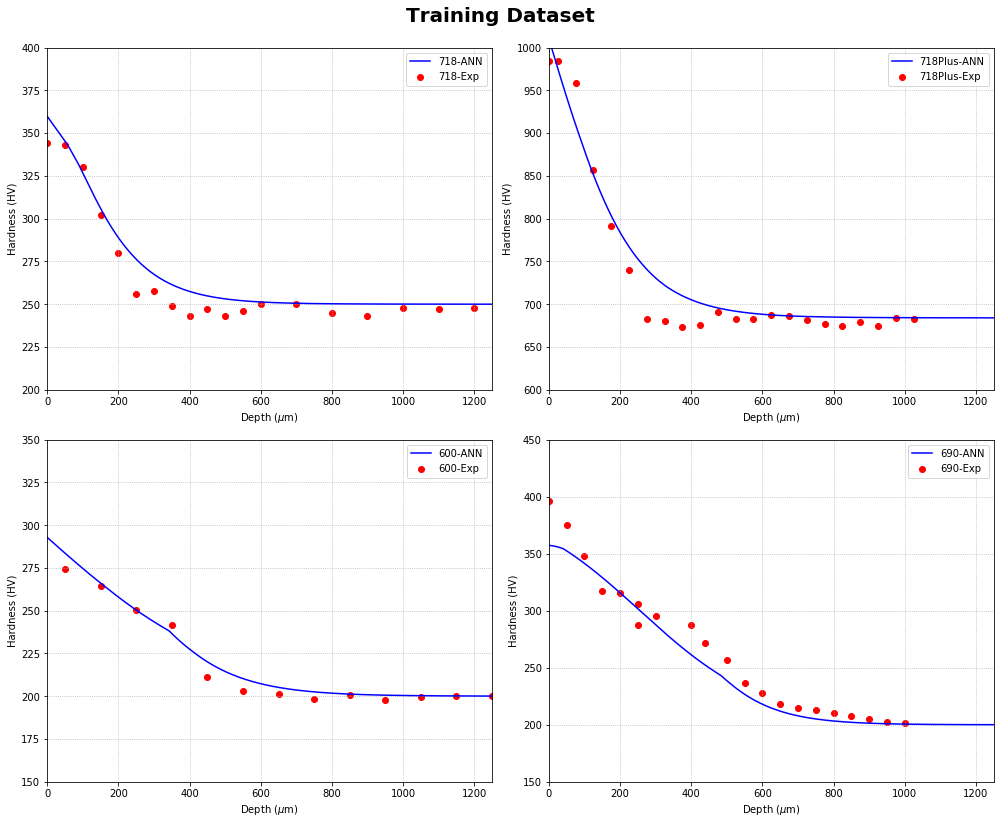

In [9]:


fig, ax = plt.subplots(2,2,figsize=(14,12))

res=cal('718',80,30,5714.3)
ax[0,0].set_xlabel('Depth ($\mu$m)')
ax[0,0].set_ylabel('Hardness (HV)')
ax[0,0].plot(res['Depth'], res['Predict'],label='718-ANN',color='b')  
ax[0,0].scatter(data['D_718'],data['H_718'],label='718-Exp',marker='o',color='r') 
ax[0,0].set_ylim((200,400))
ax[0,0].set_xlim((0,1250))
ax[0,0].axhline(y=0, color='k')
# set the y-spine
ax[0,0].grid(linestyle=':')
ax[0,0].legend()

res=cal('718Plus',40,16,40000)

ax[0,1].set_xlabel('Depth ($\mu$m)')
ax[0,1].set_ylabel('Hardness (HV)')
ax[0,1].plot(res['Depth'], res['Predict'],label='718Plus-ANN',color='b')  
ax[0,1].scatter(data['D_718Plus'],data['H_718Plus'],label='718Plus-Exp',marker='o',color='r') 
ax[0,1].set_ylim((600,1000))
ax[0,1].set_xlim((0,1250))
ax[0,1].axhline(y=0, color='k')
# set the y-spine
ax[0,1].grid(linestyle=':')
ax[0,1].legend()

res1=cal('600_1',50,30,8571)
res2=cal('600_1',10,30,8571)
res3=cal('600',120,50,20000)
res4=cal('600_1',30,30,8571)
ax[1,0].set_xlabel('Depth ($\mu$m)')
ax[1,0].set_ylabel('Hardness (HV)')

ax[1,0].plot(res3['Depth'], res3['Predict'],label='600-ANN',color='b')  
ax[1,0].scatter(data['D_600_3'],data['H_600_3'],label='600-Exp',marker='o',color='r') 

ax[1,0].set_ylim((150,350))
ax[1,0].set_xlim((0,1250))
ax[1,0].axhline(y=0, color='k')
# set the y-spine
ax[1,0].grid(linestyle=':')
ax[1,0].legend()

res=cal('690',50,50,8571.4)

ax[1,1].set_xlabel('Depth ($\mu$m)')
ax[1,1].set_ylabel('Hardness (HV)')
ax[1,1].plot(res['Depth'], res['Predict'],label='690-ANN',color='b')  
ax[1,1].scatter(data['D_690'],data['H_690'],label='690-Exp',marker='o',color='r') 
ax[1,1].set_ylim((150,450))
ax[1,1].set_xlim((0,1250))
ax[1,1].axhline(y=0, color='k')
# set the y-spine
ax[1,1].grid(linestyle=':')
ax[1,1].legend()

fig.suptitle('Training Dataset',y=0.98,fontsize=20, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('Plot\\splot_train.png',dpi=250)
plt.show()



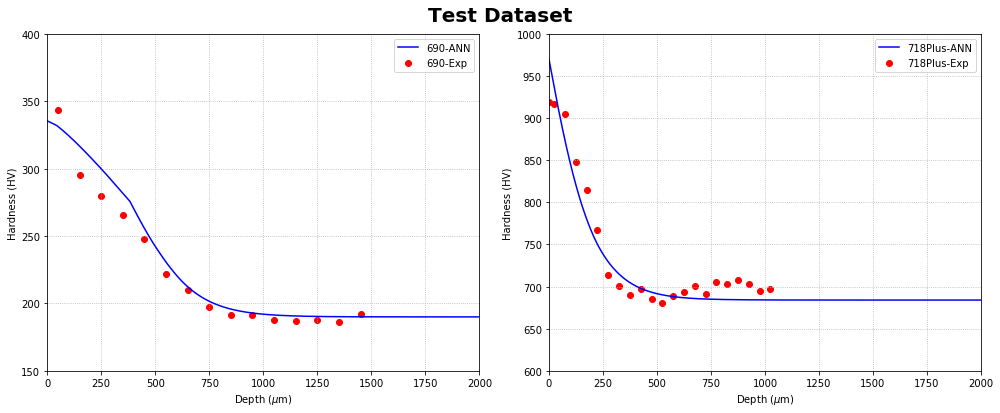

In [10]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

res=cal('690_1',120,50,20000)
ax[0].set_xlabel('Depth ($\mu$m)')
ax[0].set_ylabel('Hardness (HV)')
ax[0].plot(res['Depth'], res['Predict'],label='690-ANN',color='b')  
ax[0].scatter(data['VD_690'],data['VH_690'],label='690-Exp',marker='o',color='r') 
ax[0].set_ylim((150,400))
ax[0].set_xlim((0,2000))
ax[0].axhline(y=0, color='k')
# set the y-spine
ax[0].grid(linestyle=':')
ax[0].legend()

res=cal('718Plus',20,8,40000)

ax[1].set_xlabel('Depth ($\mu$m)')
ax[1].set_ylabel('Hardness (HV)')
ax[1].plot(res['Depth'], res['Predict'],label='718Plus-ANN',color='b')  
ax[1].scatter(data['VD_718Plus'],data['VH_718Plus'],label='718Plus-Exp',marker='o',color='r') 
ax[1].set_ylim((600,1000))
ax[1].set_xlim((0,2000))
ax[1].axhline(y=0, color='k')
# set the y-spine
ax[1].grid(linestyle=':')
ax[1].legend()




fig.suptitle('Test Dataset',y=0.98,fontsize=20, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('Plot\\splot_test.png',dpi=250)
plt.show()



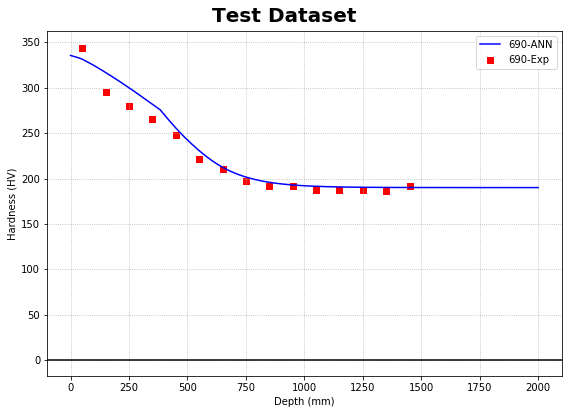

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

res=cal('690_1',120,50,20000)
ax.set_xlabel('Depth (mm)')
ax.set_ylabel('Hardness (HV)')
ax.plot(res['Depth'], res['Predict'],label='690-ANN',color='b')  
ax.scatter(data['VD_690'],data['VH_690'],label='690-Exp',marker='s',color='r') 
ax.axhline(y=0, color='k')
# set the y-spine
ax.grid(linestyle=':')
ax.legend()

fig.suptitle('Test Dataset',y=0.98,fontsize=20, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.savefig('Plot\\splot_test.png',dpi=1000)
plt.show()

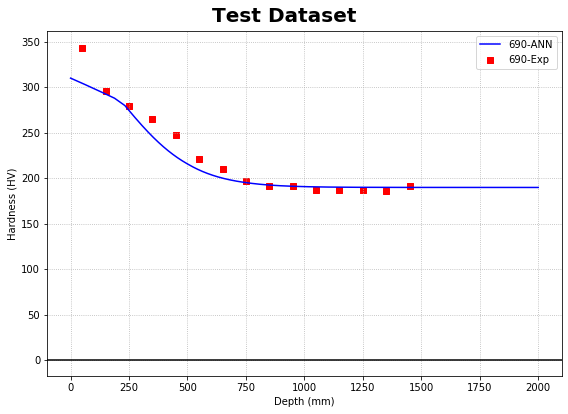

In [30]:
fig, ax = plt.subplots(figsize=(8,6))

res=cal('690_1',120,10,40000)
ax.set_xlabel('Depth (mm)')
ax.set_ylabel('Hardness (HV)')
ax.plot(res['Depth'], res['Predict'],label='690-ANN',color='b')  
ax.scatter(data['VD_690'],data['VH_690'],label='690-Exp',marker='s',color='r') 
ax.axhline(y=0, color='k')
# set the y-spine
ax.grid(linestyle=':')
ax.legend()

fig.suptitle('Test Dataset',y=0.98,fontsize=20, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.savefig('Plot\\splot_test.png',dpi=1000)
plt.show()

In [63]:
def norm(x):     
    return (x-min)/(max-min)

max=[1000,20,35,2000,40000,150,100]
max=np.array(max)
min=[0,0,0,0,0,0,0]
min=np.array(min)

column_names=['Hard-U','Fe %','Cr %','Depth','Strikes/mm2','Static Force','Amplitude','Hardness']
column_names_r=['Hard-U','Fe %','Cr %','Depth','Strikes/mm2','Static Force','Amplitude']



#insert parameter 
def set_mat(material):
    
    if material =='718':
        fe=17.62
        hard=400
        cr=18.84
    if material =='7182':
        fe=17.62
        hard=400
        cr=18.84
    elif material=='718Plus':
        fe=9.66
        hard=684
        cr=17.42
    elif material=='600':
        fe=9.42
        hard=400
        cr=16.35
    elif material=='600_1':
        fe=9.42
        hard=160
        cr=16.35
    elif material=='690':
        fe=11.6
        hard=400
        cr=29.9
    elif material=='690_1':
        fe=11.6
        hard=190
        cr=29.9
    return fe,hard,cr

# load_path='Final Model\\Trial-5\model.h5'
dir_path='Final Model\\Trial-6\\'
load_path=dir_path+'best_model.h5'
model = keras.models.load_model(load_path)



def cal(mat,x,y,z):   
    
        #insert parameter 
       
    fe,hard,cr =set_mat(mat)

    st_force=x
    amp=y
    num_strike=z
    max_depth=2000


    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,6]=amp
    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)
    data[:,5]=st_force 
        
    normed=norm(data)

    test_predictions= model.predict(normed).flatten()

    res=pd.DataFrame(data,columns=column_names_r)
    res['Predict']=(test_predictions+1)*hard
    
#     res['Gradient']=np.nan
#     res['Gradient'][0]=0
#     for k in range(1,max_depth+1):
#         k_prev=k-1
#         res['Gradient'][k]=grad(k_prev, k,res['Predict'][k_prev],res['Predict'][k])

    eff_depth=0
    res['Gradient']=test_predictions*100
    for k in range(1,max_depth+1):
        if res['Gradient'][k-1]>1 and res['Gradient'][k]<=1:
            eff_depth=k-1
    
          
    return res,eff_depth

489
545.0451
218262.54571533203
373
454.81815
156920.23468017578


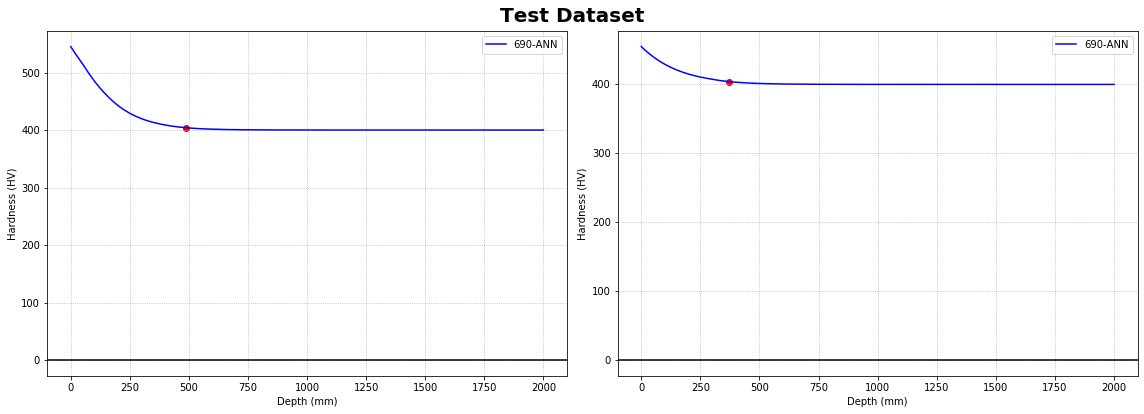

In [91]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

res,eff=cal('718',50,50,5000)
ax1.set_xlabel('Depth (mm)')
ax1.set_ylabel('Hardness (HV)')
ax1.plot(res['Depth'], res['Predict'],label='690-ANN',color='b')  
# ax.scatter(data['VD_690'],data['VH_690'],label='690-Exp',marker='s',color='r') 
ax1.axhline(y=0, color='k')
# set the y-spine
ax1.grid(linestyle=':')
ax1.legend()

print(eff)
area=0

m=np.max(res['Predict'])
print(m)
for x in range(eff):
    area=area+res['Predict'][x]
print(area)
ax1.scatter(eff, res['Predict'][eff],label='T',color='r') 



res,eff=cal('718',10,50,5000)
ax2.set_xlabel('Depth (mm)')
ax2.set_ylabel('Hardness (HV)')
ax2.plot(res['Depth'], res['Predict'],label='690-ANN',color='b')  
# ax.scatter(data['VD_690'],data['VH_690'],label='690-Exp',marker='s',color='r') 
ax2.axhline(y=0, color='k')
# set the y-spine
ax2.grid(linestyle=':')
ax2.legend()



print(eff)
area=0

m=np.max(res['Predict'])
print(m)
for x in range(eff):
    area=area+res['Predict'][x]
print(area)
ax2.scatter(eff, res['Predict'][eff],label='T',color='r') 

fig.suptitle('Test Dataset',y=0.98,fontsize=20, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.savefig('Plot\\splot_test.png',dpi=1000)
plt.show()